Exercise 4.1: evolution of age distribution.

In [6]:
from signal import valid_signals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('population_us.csv')
df

,year,age,sex,people
0,1850,0,1,1483789
1,1850,0,2,1450376
2,1850,5,1,1411067
3,1850,5,2,1359668
4,1850,10,1,1260099
...,...,...,...,...
565,2000,80,2,3221898
566,2000,85,1,970357
567,2000,85,2,1981156
568,2000,90,1,336303


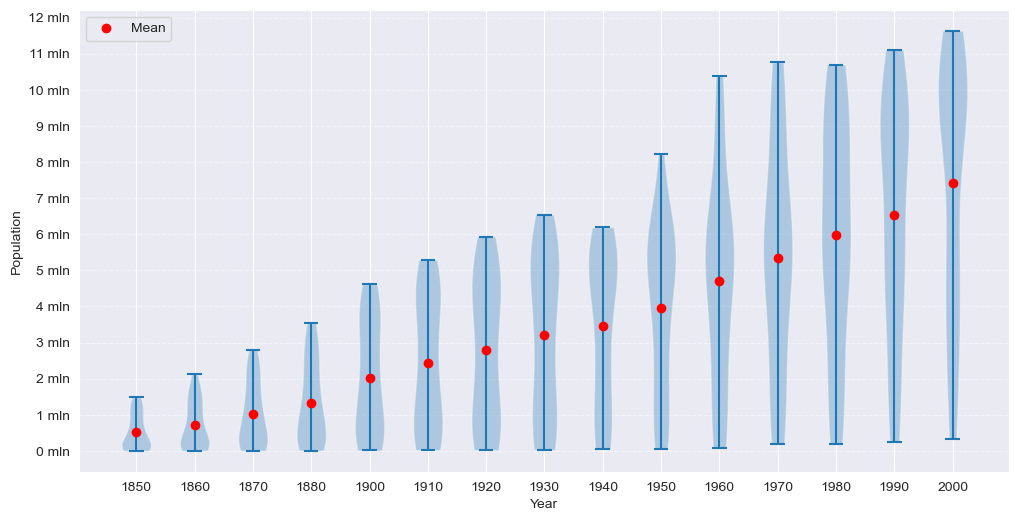

In [8]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return f'{x*1e-6:.0f} mln'



df_years = sorted(df.year.unique())
data = [df[df['year'] == y].people for y in df_years]
positions = range(len(df_years))

fig, ax = plt.subplots(figsize=(12, 6))
ax.violinplot(data, positions=positions)

means = [group.mean() for group in data]
ax.scatter(positions, means, color='red', marker='o', zorder=3, label='Mean')

# X-axis setup
ax.set_xticks(positions)
ax.set_xticklabels([str(y) for y in df_years])
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.legend()


ax.grid(axis='y', linestyle='--', alpha=0.5)

max_y = max([group.max() for group in data])
ax.set_yticks(range(0, int(max_y) + 1_000_000, 1_000_000))



ax.yaxis.set_major_formatter(FuncFormatter(millions))

plt.show()

In [9]:
df["sex"] = df["sex"].map({1: "Male", 2: "Female"})


C:\Users\dadoi\AppData\Local\Temp\ipykernel_2864\3895428831.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


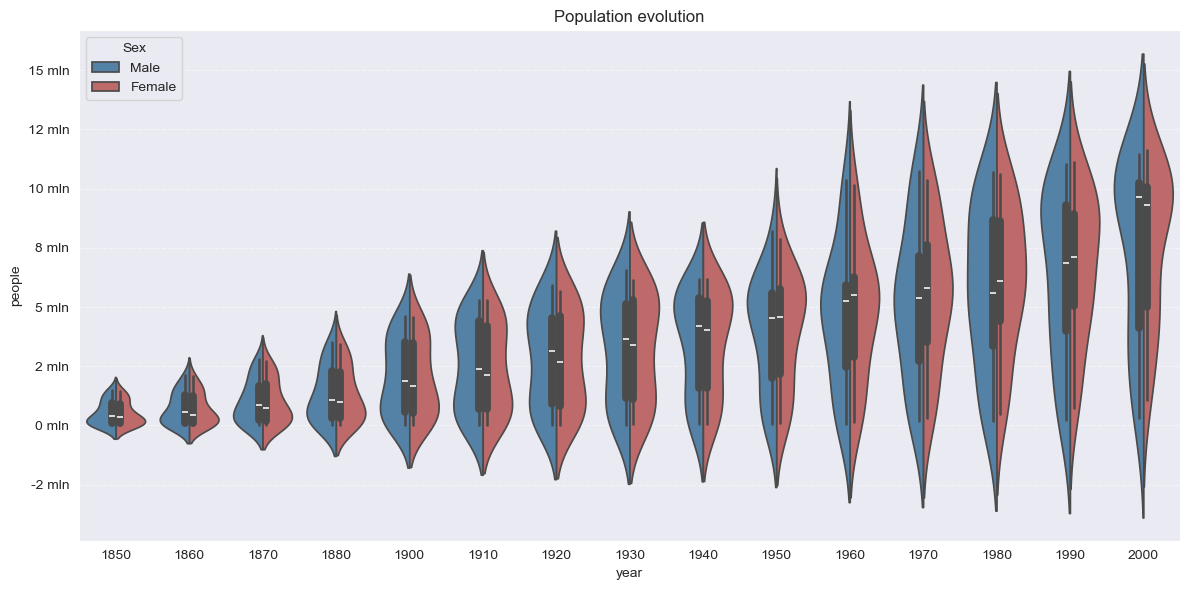

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df,
    x="year",
    y="people",
    hue="sex",
    split=True,
    scale="width",
  #cut= 0
  # bw_adjust=0.7,
    palette={"Male": "steelblue", "Female": "indianred"},
    inner="box"
)
plt.title('Population evolution')

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
#plt.ylim(bottom=0)       # hard floor at zero
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


In [36]:
import numpy as np
x = [-1, 1]
N_s = {1:[], 3:[], 10:[], 30:[], 100:[],1000:[]}
res = np.random.choice(x, 100000)
def X(N):
    x = [-1, 1]
    xvec = np.random.choice(x, N)
    res = 1/np.sqrt(N)* np.sum(xvec)
    return res

for N, v in N_s.items():
    vals = []
    for i in range(1,5000):
        vals.append(X(N))
    N_s[N] = vals



rows = [(N, val)
        for N, vals in N_s.items()
        for val in vals]

df = pd.DataFrame(rows, columns=['N', 'value'])
df

,N,value
0,1,1.000000
1,1,-1.000000
2,1,1.000000
3,1,-1.000000
4,1,-1.000000
...,...,...
29989,1000,-2.213594
29990,1000,0.316228
29991,1000,-0.569210
29992,1000,-2.023858


C:\Users\dadoi\AppData\Local\Temp\ipykernel_2864\3254162787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


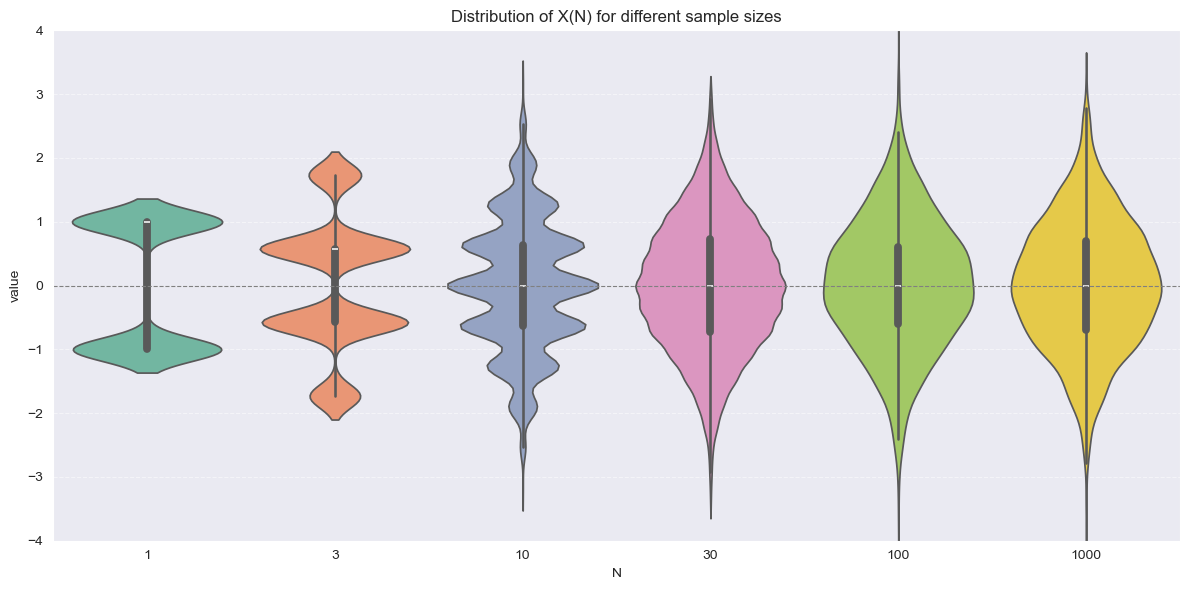

In [37]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df,
    x='N',
    y='value',
    inner='box',
    palette='Set2'
)
plt.title('Distribution of X(N) for different sample sizes')

plt.axhline(0, ls='--', c='grey', lw=0.8)
plt.ylim(-4, 4)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
